In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction/clean_credit_score_classification.csv
/kaggle/input/credit-score-prediction/train.csv
/kaggle/input/credit-score-prediction/test.csv


In [3]:
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {"axes.grid": False})

# Enviroment setting:
pd.set_option('display.float_format', lambda x:f'{x:.3f}')

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# statitics functions
from scipy import stats

# machine leaning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# supervised classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

# supervised classifer metrics
from sklearn.metrics import make_scorer, accuracy_score,recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix,confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# supvised-cross-validate-GridSearchCV

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

random_state = 42



In [4]:
import pandas as pd
df = pd.read_csv("/kaggle/input/prediction/clean_credit_score_classification.csv")
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,Good,809.980,26.823,265.000,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good
1,5635,3392,2,Aaron Maashoh,23.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,Good,809.980,31.945,265.000,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good
2,5636,3392,3,Aaron Maashoh,23.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,Good,809.980,28.609,267.000,No,49.575,81.700,Low_spent_Medium_value_payments,331.210,Good
3,5637,3392,4,Aaron Maashoh,23.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,Good,809.980,31.378,268.000,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good
4,5638,3392,5,Aaron Maashoh,23.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,Good,809.980,24.797,269.000,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good


In [5]:
test = pd.read_csv("/kaggle/input/credit-score-prediction/test.csv")
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5642,3392,9,Aaron Maashoh,23.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,4.000,Good,809.980,35.030,273.000,No,49.575,21.465,Low_spent_Small_value_payments,186.267
1,5643,3392,10,Aaron Maashoh,24.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,4.000,Good,809.980,33.053,274.000,No,49.575,21.465,High_spent_Medium_value_payments,361.444
2,5644,3392,11,Aaron Maashoh,24.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,4.000,Good,809.980,33.812,265.000,No,49.575,21.465,Low_spent_Medium_value_payments,264.675
3,5645,3392,12,Aaron Maashoh,24.000,821000265.000,Scientist,19114.120,1824.843,3.000,...,4.000,Good,809.980,32.431,276.000,No,49.575,21.465,High_spent_Medium_value_payments,343.827
4,5654,8625,9,Rick Rothackerj,28.000,4075839.000,Teacher,34847.840,3037.987,2.000,...,5.000,Good,605.030,25.927,327.000,No,18.816,39.684,High_spent_Large_value_payments,485.298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,155621,34304,12,Sarah McBridec,28.000,31350942.000,Architect,20002.880,1929.907,10.000,...,12.000,Bad,3571.700,34.781,68.000,Yes,60.965,34.663,Low_spent_Small_value_payments,275.540
49996,155630,37932,9,Nicks,25.000,78735990.000,Mechanic,39628.990,3359.416,4.000,...,7.000,Good,502.380,27.759,383.000,NM,35.104,24.028,Low_spent_Small_value_payments,409.395
49997,155631,37932,10,Nicks,25.000,78735990.000,Mechanic,39628.990,3359.416,4.000,...,7.000,Good,502.380,27.759,384.000,No,35.104,24.028,Low_spent_Large_value_payments,349.726
49998,155632,37932,11,Nicks,25.000,78735990.000,Mechanic,39628.990,3359.416,4.000,...,7.000,Good,502.380,27.759,385.000,No,35.104,24.028,High_spent_Small_value_payments,463.239


In [6]:
# drop the unecessary columns
df.drop(columns=["ID","Customer_ID","Month","Name","SSN"], inplace = True)

In [7]:
# Drop the rows we can not use in model 
df = df[df["Credit_Score"].notna()]
df.shape

(100000, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

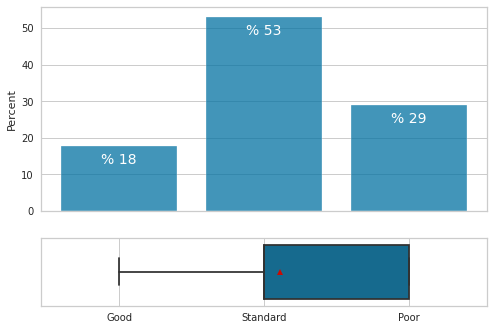

In [9]:
# check Target Feature for classification
fig,(hist, box) = plt.subplots(nrows = 2, sharex = True, 
                              gridspec_kw = {'height_ratios': [3, 1]})

sns.histplot(df['Credit_Score'], discrete=True, stat='percent', shrink=.8, 
             kde=False, ax=hist).grid(axis='y')
hist.bar_label(hist.containers[0], fmt="%% %.0f",
              padding = -21, color = "w",
              fontsize=14)
sns.boxplot(pd.factorize(df["Credit_Score"])[0],
            ax = box, showmeans=True).grid(axis = 'x')

<AxesSubplot:>

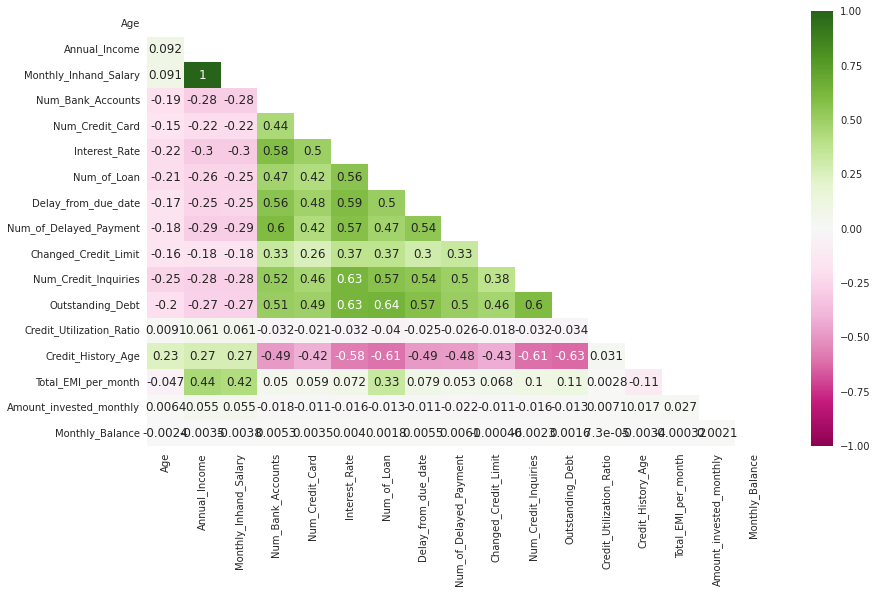

In [10]:
# correlation between numerical features
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),
           mask=np.triu(np.ones_like(df.corr(), dtype=bool))
           ,annot=True, vmin=-1, vmax =1, cmap="PiYG"
           )

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,100000.000,NaN,NaN,NaN,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.000,NaN,NaN,NaN,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,NaN,NaN,NaN,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,NaN,NaN,NaN,5.369,2.594,-1.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,NaN,NaN,NaN,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,NaN,NaN,NaN,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,NaN,NaN,NaN,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Type_of_Loan,100000,6261,No Data,11408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,100000.000,NaN,NaN,NaN,21.075,14.813,-1.000,10.000,18.000,28.000,62.000


Train | Test split

In [12]:
X = df.drop(columns = "Credit_Score") # feature
y = df["Credit_Score"] # target

X_train, X_test, y_train , y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape

((80000, 22), (20000, 22), (80000,))

Dummy Operation

In [13]:
X_train = X_train.join(X_train["Type_of_Loan"].str.get_dummies(sep = ",").add_prefix("tol_"))
X_test = X_test.join(X_test["Type_of_Loan"].str.get_dummies(sep = ",").add_prefix("tol_"))
X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"

X_train.drop(columns=["Type_of_Loan"], inplace = True)
X_test.drop(columns=["Type_of_Loan"], inplace = True)

X_train.shape, X_test.shape

((80000, 49), (20000, 49))

OneHotEncoder and LabelEncoder

In [14]:
cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train[cat]), index = X_train.index, 
    columns = enc.get_feature_names_out(cat)
)    
X_test_cat  = pd.DataFrame(
    enc.transform(X_test[cat]), index = X_test.index, 
    columns = enc.get_feature_names_out(cat)
)    
X_train_enc = X_train_cat.join(X_train.select_dtypes("number"))
X_test_enc = X_test_cat.join(X_test.select_dtypes("number"))

X_train_enc.shape, X_test_enc.shape

((80000, 72), (20000, 72))

In [15]:
X_train_enc.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

pd.DataFrame(y_train).value_counts().sort_index()

0    14301
1    23124
2    42575
dtype: int64

Scale data

In [17]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc),
                             columns = X_train_enc.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_enc),
                            columns = X_test_enc.columns)

# 01. Implement Logistic Regression Model

In [18]:
log_model = LogisticRegression(class_weight = "balanced",
                              random_state = random_state)

In [19]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [20]:
y_pred_train = log_model.predict(X_train_scaled)
y_pred_test = log_model.predict(X_test_scaled)

print(classification_report(y_train,y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000

              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.67      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000



With Best Parameters(GridsearchCV)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = LogisticRegression(
        class_weight = "balanced",
        max_iter = 1000,
        random_state = random_state)

param_grid = {
    "penalty" : ["l1"],
    "C": [0.1],
    "solver": ["saga"], #libliner
}

# Identify poeple with low credit score
recall_poor = make_scorer(recall_score, average=None,
                         labels = [1])

grid_model_log = GridSearchCV(estimator = model,
                             param_grid = param_grid,
                             scoring = recall_poor,
                             error_score = "raise",
                             n_jobs = -1,
                             cv = 5)

In [22]:
%%time
grid_model_log.fit(X_train_scaled, y_train)

CPU times: user 5.02 s, sys: 126 ms, total: 5.15 s
Wall time: 18.1 s


GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1], 'penalty': ['l1'], 'solver': ['saga']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [23]:
grid_model_log.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [24]:
grid_model_log.best_score_

0.6815861030580754

In [25]:
y_pred_train = grid_model_log.predict(X_train_scaled)
y_pred_test = grid_model_log.predict(X_test_scaled)

print(classification_report(y_train,y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000

              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.67      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000



# 02. Implement Random Forest Classifier Model

OrdinalEncoder

In [26]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes(exclude = "number").columns.to_list()

enc = OrdinalEncoder(handle_unknown = "use_encoded_value",
                    unknown_value = -1)

X_train[cat] = enc.fit_transform(X_train[cat])
X_test[cat] = enc.transform(X_test[cat])

X_train.shape, X_test.shape

((80000, 49), (20000, 49))

RandomForest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(class_weight = "balanced",
                                  random_state = random_state)

In [28]:
%%time
rfc_model.fit(X_train, y_train)

CPU times: user 31.5 s, sys: 121 ms, total: 31.6 s
Wall time: 31.6 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
y_pred_train = rfc_model.predict(X_train)
y_pred_test = rfc_model.predict(X_test)

print(classification_report(y_train,y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14301
           1       1.00      1.00      1.00     23124
           2       1.00      1.00      1.00     42575

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      3527
           1       0.80      0.83      0.82      5874
           2       0.83      0.82      0.83     10599

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [30]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}
# Identify people with low credit scores
recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
#     verbose=2,
    n_jobs=-1,
    cv=5,
)

In [31]:
%%time
grid_model_rfc.fit(X_train, y_train)

CPU times: user 3.28 s, sys: 24.5 ms, total: 3.3 s
Wall time: 9.29 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [None],
                         'n_estimators': [10]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [32]:
grid_model_rfc.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}

In [33]:
grid_model_rfc.best_score_

0.8050509959786776

In [34]:
y_pred_train = grid_model_rfc.predict(X_train)
y_pred_test = grid_model_rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.75      0.62     14301
           1       0.61      0.80      0.69     23124
           2       0.85      0.57      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.66      0.71      0.67     80000
weighted avg       0.72      0.67      0.68     80000

              precision    recall  f1-score   support

           0       0.52      0.75      0.61      3527
           1       0.61      0.80      0.69      5874
           2       0.85      0.57      0.68     10599

    accuracy                           0.67     20000
   macro avg       0.66      0.71      0.66     20000
weighted avg       0.72      0.67      0.67     20000



# 03. Implement XGBoost Classifier Model

In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = random_state)


In [36]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight = "balanced", y = y_train)
classes_weights

array([0.62634566, 1.86467147, 1.86467147, ..., 0.62634566, 0.62634566,
       1.15320302])

In [37]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0    
0      1.865    14301
1      1.153    23124
2      0.626    42575
Name: 0, dtype: int64

In [38]:
%%time
xgb_model.fit(X_train,y_train,
             sample_weight = classes_weights)

#weight parameter in XGBoost is per instance not per
# class

CPU times: user 2min 14s, sys: 266 ms, total: 2min 15s
Wall time: 34.5 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [39]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75     14301
           1       0.76      0.87      0.82     23124
           2       0.91      0.71      0.80     42575

    accuracy                           0.79     80000
   macro avg       0.77      0.83      0.79     80000
weighted avg       0.82      0.79      0.79     80000

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      3527
           1       0.73      0.82      0.77      5874
           2       0.87      0.67      0.76     10599

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.74     20000
weighted avg       0.78      0.75      0.75     20000



In [40]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators':[50, 100],
}
# Identify people with low credit scores
recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
    n_jobs=-1
)

In [41]:
%%time
grid_model_xgb.fit(X_train, y_train, 
                  sample_weight = classes_weights)

CPU times: user 2min 13s, sys: 203 ms, total: 2min 13s
Wall time: 4min 28s


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [42]:
grid_model_xgb.best_params_

{'n_estimators': 100}

In [43]:
grid_model_xgb.best_score_

0.8232142710184233

In [44]:
y_pred_train = grid_model_xgb.predict(X_train)
y_pred_test  = grid_model_xgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75     14301
           1       0.76      0.87      0.82     23124
           2       0.91      0.71      0.80     42575

    accuracy                           0.79     80000
   macro avg       0.77      0.83      0.79     80000
weighted avg       0.82      0.79      0.79     80000

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      3527
           1       0.73      0.82      0.77      5874
           2       0.87      0.67      0.76     10599

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.74     20000
weighted avg       0.78      0.75      0.75     20000



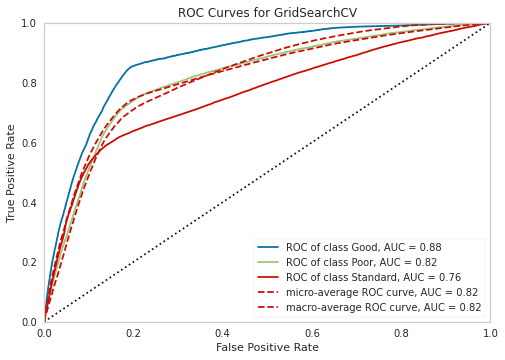

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
from yellowbrick.classifier import ROCAUC
model = grid_model_log

visualizer = ROCAUC(model, encoder={0: "Good", 
                                   1: "Poor",
                                   2: "Standard"})
visualizer.fit(X_train_scaled, y_train)
#fit the training dfata to the visualizer
visualizer.score(X_train_scaled, y_train)
# evaluate the model on the test data
visualizer.show()

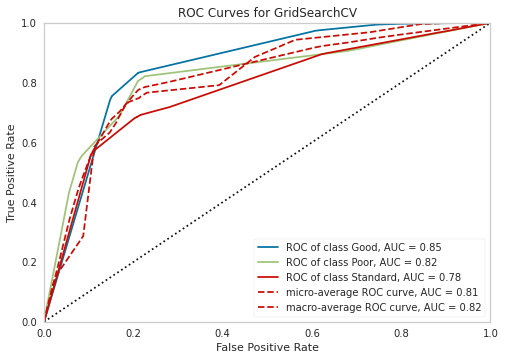

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
from yellowbrick.classifier import ROCAUC
model = grid_model_rfc

visualizer = ROCAUC(model, encoder={0: "Good", 
                                   1: "Poor",
                                   2: "Standard"})
visualizer.fit(X_train, y_train)
#fit the training dfata to the visualizer
visualizer.score(X_train, y_train)
# evaluate the model on the test data
visualizer.show()

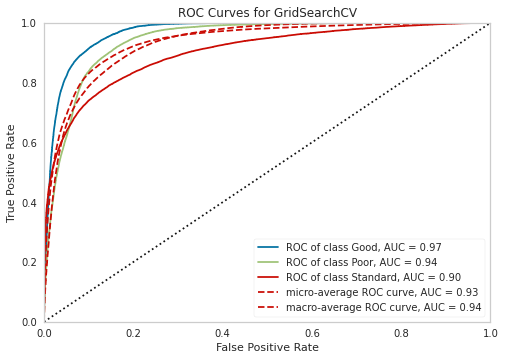

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
from yellowbrick.classifier import ROCAUC
model = grid_model_xgb

visualizer = ROCAUC(model, encoder={0: "Good", 
                                   1: "Poor",
                                   2: "Standard"})
visualizer.fit(X_train, y_train)
#fit the training dfata to the visualizer
visualizer.score(X_train, y_train)
# evaluate the model on the test data
visualizer.show()

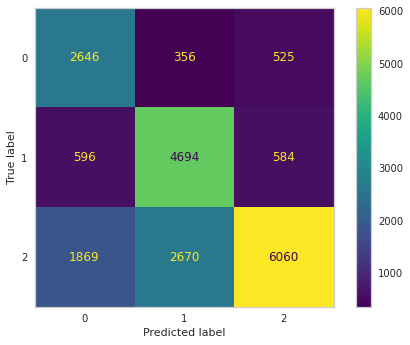

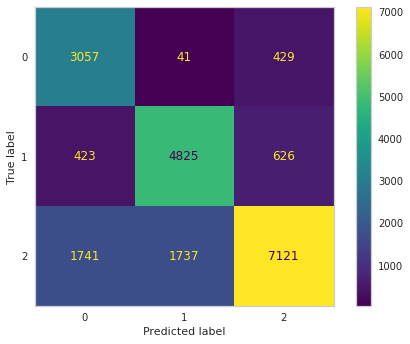

In [49]:
plot_confusion_matrix(grid_model_rfc, X_test, y_test)

plot_confusion_matrix(grid_model_xgb, X_test, y_test)

# 04. Future Importance XGBoost

Permutation Based Feature Importance(with scikit-learn)

In [51]:
#xgb_model has best scorer default parameter

xgb_model.feature_importances_

array([0.00845307, 0.00939238, 0.01025769, 0.01200138, 0.01787825,
       0.03056719, 0.11073121, 0.01276637, 0.01592977, 0.01323863,
       0.01562317, 0.01182006, 0.3528172 , 0.07060619, 0.0041705 ,
       0.0086033 , 0.01522687, 0.01451772, 0.00569097, 0.01001538,
       0.0050902 , 0.00869145, 0.00929807, 0.00999413, 0.00832574,
       0.00819576, 0.01072138, 0.00780628, 0.00871624, 0.00878437,
       0.00955841, 0.00954988, 0.01023204, 0.00986795, 0.00877822,
       0.00980446, 0.0091591 , 0.00641946, 0.00809117, 0.01027655,
       0.00935421, 0.00989475, 0.00813556, 0.00784992, 0.        ,
       0.01092856, 0.00730368, 0.008665  , 0.01020009], dtype=float32)

<BarContainer object of 49 artists>

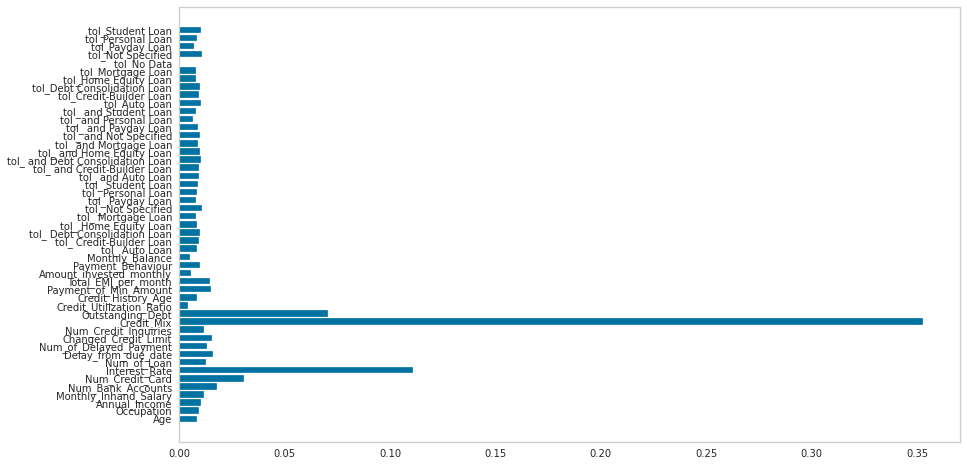

In [52]:
plt.figure(figsize = (14, 8))
plt.barh(X_test.columns, xgb_model.feature_importances_)

In [53]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb_model, X_test, y_test)
perm_importance

{'importances_mean': array([ 7.1400e-03,  5.8600e-03,  1.2210e-02,  2.0970e-02,  1.4050e-02,
         1.1300e-02,  8.6580e-02,  3.7000e-04,  4.3610e-02,  1.4220e-02,
         3.2900e-02,  7.5800e-03,  1.6123e-01,  6.4780e-02,  6.5000e-04,
         1.0520e-02, -3.2600e-03,  3.7030e-02,  2.1000e-04,  2.5600e-03,
         4.4800e-03,  3.7000e-04,  5.5000e-04, -1.6000e-04,  1.0000e-05,
         2.2000e-04,  8.1000e-04, -3.5000e-04,  3.4000e-04,  8.1000e-04,
         2.5000e-04,  4.4000e-04,  7.1000e-04,  8.0000e-04,  1.1000e-04,
         3.3000e-04,  4.6000e-04,  1.4300e-03,  1.8000e-04,  4.7000e-04,
         4.4000e-04,  5.7000e-04,  2.2000e-04,  3.4000e-04,  0.0000e+00,
        -1.6000e-04,  1.6000e-04,  4.8000e-04,  3.4000e-04]),
 'importances_std': array([7.79358711e-04, 5.05371151e-04, 1.52098652e-03, 1.76113600e-03,
        1.21696343e-03, 9.80306075e-04, 2.79008960e-03, 5.30659966e-04,
        1.66204693e-03, 1.14000000e-03, 1.03101891e-03, 1.07870292e-03,
        3.70696641e-03, 1.

Text(0.5, 0, 'Permutation Importance')

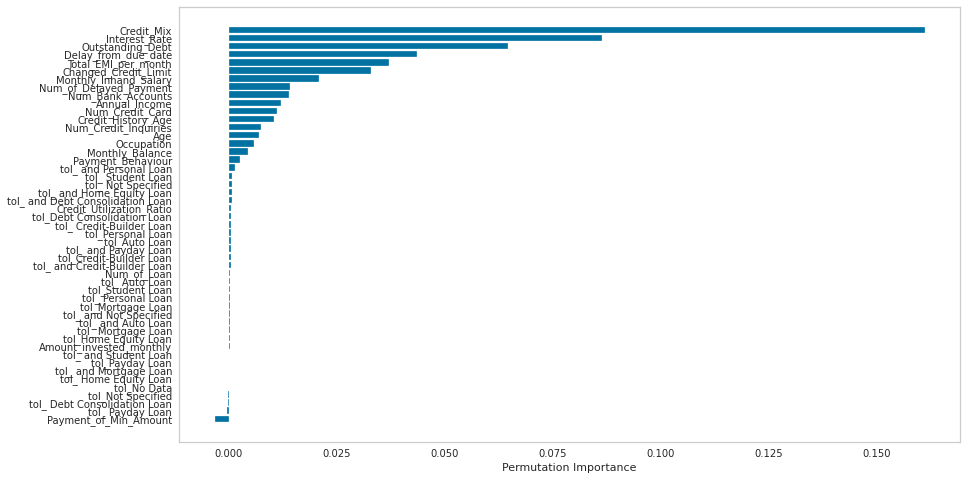

In [54]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (14,8))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [58]:
X_test.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'tol_ Auto Loan', 'tol_ Credit-Builder Loan',
       'tol_ Debt Consolidation Loan', 'tol_ Home Equity Loan',
       'tol_ Mortgage Loan', 'tol_ Not Specified', 'tol_ Payday Loan',
       'tol_ Personal Loan', 'tol_ Student Loan', 'tol_ and Auto Loan',
       'tol_ and Credit-Builder Loan', 'tol_ and Debt Consolidation Loan',
       'tol_ and Home Equity Loan', 'tol_ and Mortgage Loan',
       'tol_ and Not Specified', 'tol_ and Payday Loan',
       'tol_ and Personal Loan', 'tol_ and Student Loan', 'tol_Aut

# 05. Final Model


In [59]:
# we select 8 features for final model
df_final = df[["Credit_Mix", "Interest_Rate",
              "Outstanding_Debt","Delay_from_due_date",
              "Total_EMI_per_month","Changed_Credit_Limit",
              "Monthly_Inhand_Salary","Annual_Income",
              "Credit_Score"]]

In [60]:
df_final

,Credit_Mix,Interest_Rate,Outstanding_Debt,Delay_from_due_date,Total_EMI_per_month,Changed_Credit_Limit,Monthly_Inhand_Salary,Annual_Income,Credit_Score
0,Good,3.000,809.980,3.000,49.575,11.270,1824.843,19114.120,Good
1,Good,3.000,809.980,-1.000,49.575,11.270,1824.843,19114.120,Good
2,Good,3.000,809.980,3.000,49.575,11.270,1824.843,19114.120,Good
3,Good,3.000,809.980,5.000,49.575,6.270,1824.843,19114.120,Good
4,Good,3.000,809.980,6.000,49.575,11.270,1824.843,19114.120,Good
...,...,...,...,...,...,...,...,...,...
99995,Good,7.000,502.380,23.000,35.104,11.500,3359.416,39628.990,Poor
99996,Good,7.000,502.380,18.000,35.104,11.500,3359.416,39628.990,Poor
99997,Good,7.000,502.380,27.000,35.104,11.500,3359.416,39628.990,Poor
99998,Good,7.000,502.380,20.000,35.104,11.500,3359.416,39628.990,Standard


In [62]:
X = df_final.drop(columns="Credit_Score")
y = df_final["Credit_Score"]

In [64]:
cat = X.select_dtypes(exclude = 'number').columns.to_list()
enc = OrdinalEncoder(handle_unknown ='use_encoded_value',
                    unknown_value = -1)

X[cat]= enc.fit_transform(X[cat])
X.shape

(100000, 8)

In [67]:
le = LabelEncoder()
y = le.fit_transform(y)

In [70]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y)
classes_weights

array([1.86971805, 1.86971805, 1.86971805, ..., 1.14950456, 0.62687278,
       1.14950456])

In [71]:
final_model = XGBClassifier(random_state = random_state)

In [74]:
%%time
final_model.fit(X,y, sample_weight = classes_weights)

CPU times: user 46.6 s, sys: 119 ms, total: 46.7 s
Wall time: 12.1 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [75]:
y_pred = final_model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70     17828
           1       0.75      0.83      0.79     28998
           2       0.89      0.67      0.76     53174

    accuracy                           0.75    100000
   macro avg       0.74      0.80      0.75    100000
weighted avg       0.79      0.75      0.76    100000



In [76]:
mean_human = {
 'Credit_Mix': 'Standard',
 'Interest_Rate': 14,
 'Outstanding_Debt': 1426,
 'Delay_from_due_date': 21,
 'Total_EMI_per_month': 107,
 'Changed_Credit_Limit': 10,
 'Monthly_Inhand_Salary': 4197,
 'Annual_Income': 50505,
}
mean_human = pd.DataFrame([mean_human])
mean_human[cat] = enc.transform(mean_human[cat])
mean_human

,Credit_Mix,Interest_Rate,Outstanding_Debt,Delay_from_due_date,Total_EMI_per_month,Changed_Credit_Limit,Monthly_Inhand_Salary,Annual_Income
0,2.000,14,1426,21,107,10,4197,50505


In [78]:
predict = final_model.predict(mean_human)
predict, le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

In [79]:
import pickle
pickle.dump(final_model, open("final_model_credit_score_pred", 'wb'))